# Transmission spectra: species

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob as glob
import matplotlib as mpl
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
import seaborn as sns

import corner
import json
import pathlib
import pickle
import utils
import warnings

from astropy import constants as const
from astropy import units as uni
from astropy.io import ascii, fits
from astropy.time import Time
from mpl_toolkits.axes_grid1 import ImageGrid

# Default figure dimensions
FIG_WIDE = (11, 5)
FIG_LARGE = (8, 11)

# Figure style
sns.set(style="ticks", palette="colorblind", color_codes=True, context="talk")
params = utils.plot_params()
plt.rcParams.update(params)

## [Dowload data](https://www.dropbox.com/sh/uq1xldws7y58qbg/AACPHyMPymeN4mdmxTuQt4aUa?dl=1)

Unzip this into a folder named `data` in the same level as this notebook

## Plot

offsets: [-611.60443347 -116.87211182 1078.29031659  258.46171612 -330.57012608]
offsets (% mean wlc depth): [-4.72337035 -0.90259363  8.32754674  1.99607841 -2.55296568]
Saving tspec to: data/tspec_species/tspec_s.csv
mean WLC depth: 12948.475103927114 241.36135134300847
Rp (Rj): 1.2756347714677376 jupiterRad
Rs (Rsun): 1.152 solRad
gp (m/s^2): 2924.583857233773 cm / s2


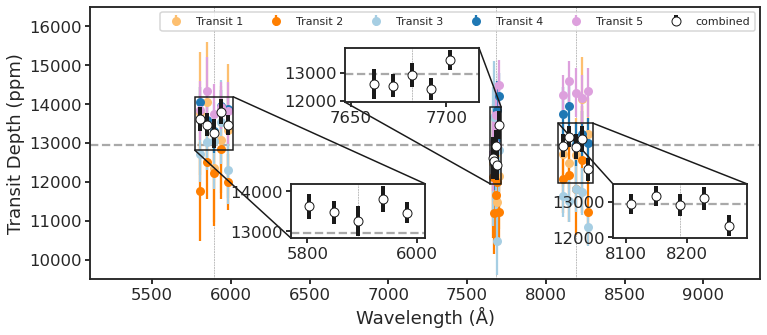

In [4]:
base_dir = "data/tspec_species"

fig, ax = plt.subplots(figsize=FIG_WIDE)

utils.plot_tspec_IMACS(ax, base_dir)

# Save
fig.tight_layout()
fig.set_size_inches(FIG_WIDE)
utils.savefig(f"../paper/figures/tspec_species/tspec_species.pdf")

## Table

In [9]:
pd.read_csv("data/tspec_species/tspec_s.csv")#.to_clipboard(index=False)

,Wavelength (Å),Transit 1,Transit 2,Transit 3,Transit 4,Transit 5,Combined
0,5780.4 - 5825.4,13800^{+1600}_{-1600},11800^{+1300}_{-1300},12700^{+700}_{-700},14000^{+400}_{-400},13800^{+800}_{-800},13600 \pm 300
1,5825.4 - 5870.4,14100^{+1500}_{-1600},12500^{+700}_{-1000},13000^{+700}_{-700},13600^{+400}_{-400},14300^{+900}_{-1000},13500 \pm 300
2,5870.4 - 5915.4,12400^{+1400}_{-1400},12200^{+1400}_{-1400},13000^{+1000}_{-1200},13300^{+500}_{-600},13800^{+800}_{-800},13300 \pm 400
3,5915.4 - 5960.4,13100^{+1400}_{-1400},12900^{+1300}_{-1300},13500^{+1100}_{-1100},14000^{+400}_{-500},13900^{+600}_{-600},13800 \pm 300
4,5960.4 - 6005.4,13300^{+1700}_{-1700},12000^{+700}_{-700},12300^{+800}_{-900},13900^{+300}_{-300},13800^{+700}_{-900},13500 \pm 300
5,7657.0 - 7667.0,12500^{+1500}_{-1400},12100^{+1700}_{-1600},12600^{+1800}_{-1800},12800^{+900}_{-800},12800^{+1100}_{-1000},12600 \pm 500
6,7667.0 - 7677.0,12500^{+1500}_{-1400},11200^{+1100}_{-1100},13700^{+1400}_{-1500},12500^{+600}_{-700},13000^{+800}_{-800},12500 \pm 400
7,7677.0 - 7687.0,12700^{+1400}_{-1300},11700^{+1200}_{-1200},12300^{+1100}_{-1100},13100^{+700}_{-800},13700^{+800}_{-800},12900 \pm 400
8,7687.0 - 7697.0,11500^{+1000}_{-1100},12000^{+1400}_{-1300},10500^{+900}_{-900},13800^{+700}_{-700},12900^{+700}_{-700},12400 \pm 400
9,7697.0 - 7707.0,12100^{+1400}_{-1400},11200^{+900}_{-900},12800^{+1100}_{-1100},14200^{+600}_{-700},14500^{+700}_{-700},13500 \pm 400
